### ***This code for classification into tags for ted.com videos depending on video transcript***

# **import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


# **Read dataset file**

In [32]:
df = pd.read_csv("d.csv")

In [33]:
df.columns

Index(['id', 'title', 'author', 'date', 'views', 'tags', 'link', 'transcript'], dtype='object')

In [34]:
df.shape

(1088, 8)

In [35]:
df.head(10)

,id,title,author,date,views,tags,link,transcript
0,0,The Egyptian myth of the death of Osiris,Alex Gendler,Jul 2020,"208,703","education,ancient world,TED-Ed",https://embed.ted.com/talks/alex_gendler_the_e...,[</div>It was a feast like Egypt had never see...
1,1,What if you could help decide how the governme...,Shari Davis,Jul 2020,"425,688","democracy,leadership,community",https://embed.ted.com/talks/shari_davis_what_i...,"[</div>My name is Shari Davis,and let's be hon..."
2,2,Want a more just world? Be an unlikely ally,Nita Mosby Tyler,Jul 2020,"460,269","activism,inequality,race",https://embed.ted.com/talks/nita_mosby_tyler_w...,"[</div>You can ask anyone you want,and they wi..."
3,3,The race to decode a mysterious language,Susan Lupack,Jul 2020,"350,202","TED-Ed,education,language",https://embed.ted.com/talks/susan_lupack_the_r...,"[</div>In the early s on the island of Crete,B..."
4,4,The colorful critter world of microbes in Anta...,Ariel Waldman,Jul 2020,"333,482","science,animals,exploration",https://embed.ted.com/talks/ariel_waldman_the_...,[</div>Can you guess what this is?What if I to...
5,5,Why violence clusters in cities — and how to r...,Thomas Abt,Jul 2020,"50,273","violence,United States,crime",https://embed.ted.com/talks/thomas_abt_why_vio...,"[</div>You are a trauma surgeon,working in the..."
6,6,What makes volcanoes erupt?,Steven Anderson,Jul 2020,"169,272","TED-Ed,education,animation",https://embed.ted.com/talks/steven_anderson_wh...,"[</div>In February of , Mexican farmer Dionisi..."
7,7,What happens when biology becomes technology?,Christina Agapakis,Jul 2020,"575,657","science,biology,nature",https://embed.ted.com/talks/christina_agapakis...,[</div>A briefcase full of poop changed my lif...
8,8,Rethinking education and celebrating the Arabi...,Ahmad M. Hasnah,Jul 2020,NaN,"education,society,future",https://embed.ted.com/talks/ahmad_m_hasnah_ret...,"[</div>Hello, I am going to be joined shortly ..."
9,9,What happened when the United States tried to ...,Rod Phillips,Jul 2020,"262,067","TED-Ed,animation,government",https://embed.ted.com/talks/rod_phillips_what_...,"[</div>On January , , six armed men robbed a C..."


# **Visualizing the count of 'tags' column from the dataset**

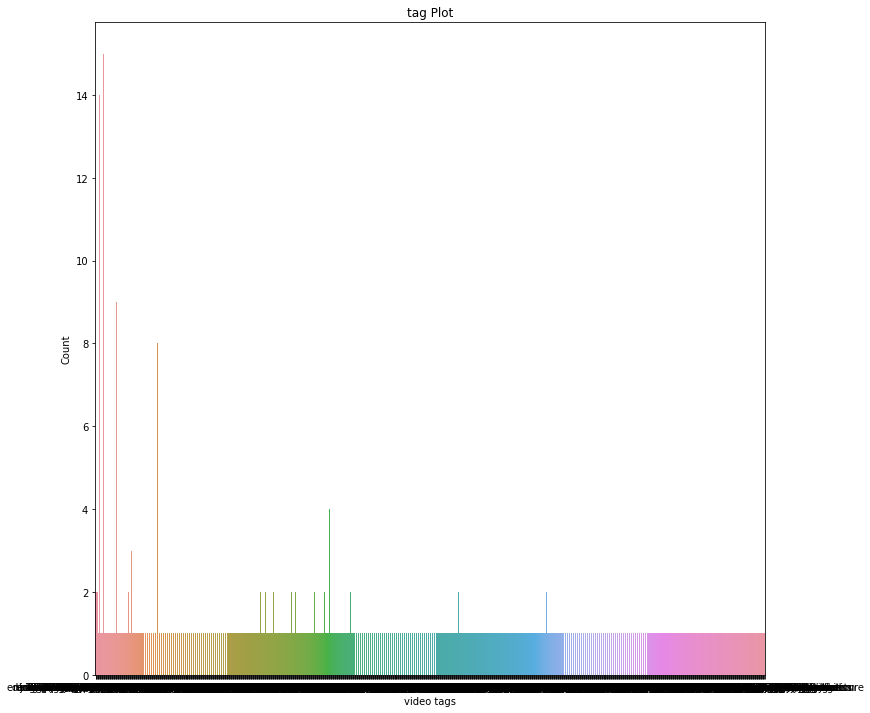

In [36]:
plt.figure(figsize=(12,12))
sns.countplot(x='tags', data=df)
plt.xlabel('video tags')
plt.ylabel('Count')
plt.title('tag Plot')
plt.show()

# **Data Cleaning and Preprocessing**

In [37]:
transcript_tags = list(df['tags'].unique())
tagset = set()
for li in transcript_tags:
    print(li)
    strtemp = ''
    for i in range(0, len(li)):
        if li[i] == ',':
            tagset.add(strtemp)
            strtemp = ''
        else:
            strtemp += li[i]
transcript_tags = list(tagset)

education,ancient world,TED-Ed
democracy,leadership,community
activism,inequality,race
TED-Ed,education,language
science,animals,exploration
violence,United States,crime
TED-Ed,education,animation
science,biology,nature
education,society,future
TED-Ed,animation,government
nature,animals,humanity
technology,robots,innovation
TED-Ed,animation,education
math,education,history
Africa,journalism,humor
TED-Ed,education,math
education,TED-Ed,language
gender,race,Gender spectrum
art,history,race
coronavirus,pandemic,science
cancer,illness,life
history,food,indigenous peoples
life,adventure,personal growth
leadership,government,women
humanity,community,communication
storytelling,media,arts
environment,climate change,global issues
TED-Ed,animation,writing
business,arts,music
education,TED-Ed,animation
global issues,history,philosophy
animation,TED-Ed,education
government,technology,democracy
LGBT,social change,Transgender
LGBT,love,social change
life,family,LGBT
LGBT,gay,community
Audacious Proj

# **Mapping the genres to values**

In [38]:
tags_mapper = dict()
i = 0
for tag in transcript_tags:
  tags_mapper[tag] = i
  i += 1
df['tags'] = df['tags'].map(tags_mapper)


In [39]:
df.head(10)

,id,title,author,date,views,tags,link,transcript
0,0,The Egyptian myth of the death of Osiris,Alex Gendler,Jul 2020,"208,703",NaN,https://embed.ted.com/talks/alex_gendler_the_e...,[</div>It was a feast like Egypt had never see...
1,1,What if you could help decide how the governme...,Shari Davis,Jul 2020,"425,688",NaN,https://embed.ted.com/talks/shari_davis_what_i...,"[</div>My name is Shari Davis,and let's be hon..."
2,2,Want a more just world? Be an unlikely ally,Nita Mosby Tyler,Jul 2020,"460,269",NaN,https://embed.ted.com/talks/nita_mosby_tyler_w...,"[</div>You can ask anyone you want,and they wi..."
3,3,The race to decode a mysterious language,Susan Lupack,Jul 2020,"350,202",NaN,https://embed.ted.com/talks/susan_lupack_the_r...,"[</div>In the early s on the island of Crete,B..."
4,4,The colorful critter world of microbes in Anta...,Ariel Waldman,Jul 2020,"333,482",NaN,https://embed.ted.com/talks/ariel_waldman_the_...,[</div>Can you guess what this is?What if I to...
5,5,Why violence clusters in cities — and how to r...,Thomas Abt,Jul 2020,"50,273",NaN,https://embed.ted.com/talks/thomas_abt_why_vio...,"[</div>You are a trauma surgeon,working in the..."
6,6,What makes volcanoes erupt?,Steven Anderson,Jul 2020,"169,272",NaN,https://embed.ted.com/talks/steven_anderson_wh...,"[</div>In February of , Mexican farmer Dionisi..."
7,7,What happens when biology becomes technology?,Christina Agapakis,Jul 2020,"575,657",NaN,https://embed.ted.com/talks/christina_agapakis...,[</div>A briefcase full of poop changed my lif...
8,8,Rethinking education and celebrating the Arabi...,Ahmad M. Hasnah,Jul 2020,NaN,NaN,https://embed.ted.com/talks/ahmad_m_hasnah_ret...,"[</div>Hello, I am going to be joined shortly ..."
9,9,What happened when the United States tried to ...,Rod Phillips,Jul 2020,"262,067",NaN,https://embed.ted.com/talks/rod_phillips_what_...,"[</div>On January , , six armed men robbed a C..."


In [40]:
df.isna().any()

id            False
title         False
author        False
date          False
views          True
tags           True
link          False
transcript    False
dtype: bool

In [41]:
df.drop('id', axis=1, inplace=True)

# **Cleaning the text**

In [42]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['transcript'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\KHEDER/nltk_data'
    - 'c:\\Program Files\\Python310\\nltk_data'
    - 'c:\\Program Files\\Python310\\share\\nltk_data'
    - 'c:\\Program Files\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\KHEDER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
corpus[0:2]

In [ ]:
len(corpus)

In [ ]:
Dprinting_space_science_words = []
for i in list(df[df['tags']==0].index):
    Dprinting_space_science_words.append(corpus[i])

AI_TEDFellows_medicine_words = []
for i in list(df[df['tags']==1].index):
    AI_TEDFellows_medicine_words.append(corpus[i])

AI_machinelearning_education_words = []
for i in list(df[df['tags']==2].index):
    AI_machinelearning_education_words.append(corpus[i])

Dprinting_space_science = ''
AI_TEDFellows_medicine_words = ''
AI_machinelearning_education = ''
for i in range(0, min(len(Dprinting_space_science_words), min( len(AI_TEDFellows_medicine_words), len(AI_machinelearning_education_words)))):
    Dprinting_space_science += Dprinting_space_science_words[i]
    AI_TEDFellows_medicine_words += AI_TEDFellows_medicine_words[i]
    AI_machinelearning_education += AI_machinelearning_education_words[i]

# **Creating the Bag of Words model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = df['tags'].values

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

# **Fitting Naive Bayes to the Training set**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
y_train = np.nan_to_num(y_train)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# **Predicting the Test set results**

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)

# **Calculating Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
y_test = np.nan_to_num(y_test)
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

# **Predictions**

In [ ]:
def tag_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

# **Loading test dataset**

In [ ]:
test = pd.read_csv('d.csv')
test.columns

In [ ]:
test.shape


In [ ]:
test.drop('id', axis=1, inplace=True)
test.columns = test.columns.str.strip()

# **Predicting values**

In [ ]:
from pickle import LIST
from random import randint
row = randint(0,test.shape[0]-1)
sample_script = test.transcript[row]
print('Script: {}'.format(sample_script))
value = tag_prediction(sample_script)
value = int(value)
print('Prediction: {}'.format(list(tags_mapper.keys())[value]))